# Working with NIfTI files

This is to interact with the type of file that will be used for analysis of the ADHD 200 preprocessed dataset.

In [1]:
import os

os.path.abspath(os.curdir)
os.chdir('..')
os.chdir('..')

filepath = os.path.abspath(os.curdir)
filepath += '\\Data\\Preprocessed_data\\Brown\\0026001\\wmean_mrda0026001_session_1_rest_1.nii.gz'
print(filepath)

C:\Users\HOME\Downloads\Deep-Learning-Methods-to-Predict-Disease-in-Brain-Images-main\Data\Preprocessed_data\Brown\0026001\wmean_mrda0026001_session_1_rest_1.nii.gz


In [2]:
import nibabel as nib

brain_vol = nib.load(filepath)

type(brain_vol)

nibabel.nifti1.Nifti1Image

## Image data

To access the image data for this file, the get_fdata() function is used. This gets a numpy array consisting of float values representing the intensity of stimulus in the brain

In [3]:
brain_vol_data = brain_vol.get_fdata()
type(brain_vol_data)

numpy.ndarray

The shape of the numpy array is as shown below. There are only three dimensions, since this image is the average of all time values

In [4]:
brain_vol_data.shape

(49, 58, 47)

## Visualize

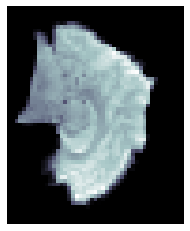

In [5]:
import matplotlib.pyplot as plt

plt.imshow(brain_vol_data[27], cmap='bone')
plt.axis('off')
plt.show()

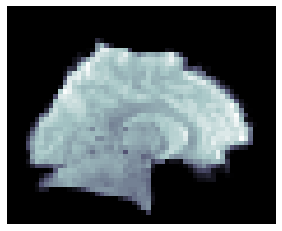

In [6]:
import scipy.ndimage as ndi

plt.imshow(ndi.rotate(brain_vol_data[27], 90), cmap='bone')
plt.axis('off')
plt.show()

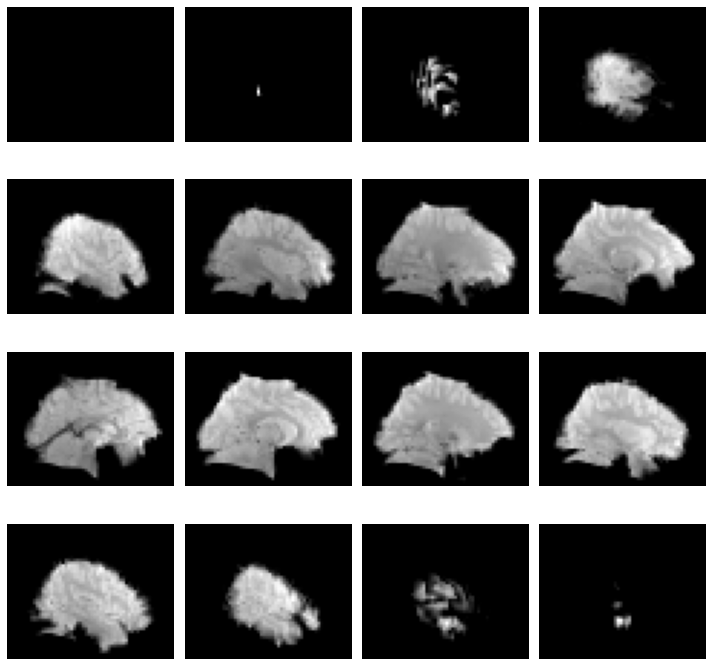

In [7]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10,10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

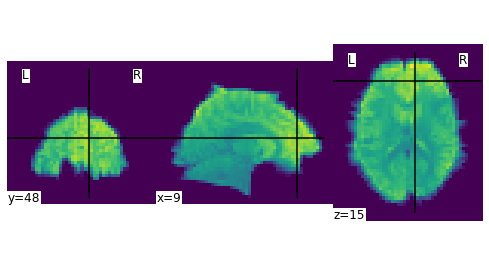

In [8]:
from nilearn import plotting

plotting.plot_img(brain_vol)
plt.show()

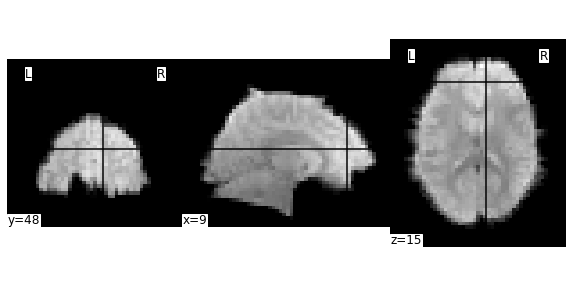

In [9]:
fig, ax = plt.subplots(figsize=[10,5])
plotting.plot_img(brain_vol, cmap='gray', axes=ax)
plt.show()

This is using `nilearn`

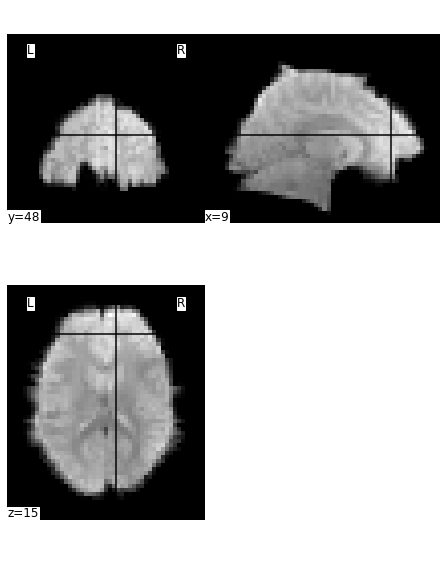

In [10]:
plotting.plot_img(brain_vol, display_mode='tiled', cmap='gray')
plt.show()

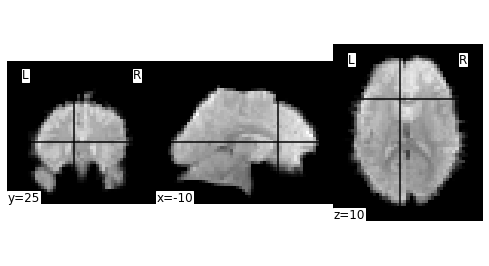

In [11]:
plotting.plot_img(brain_vol, cmap='gray', cut_coords=(-10,25,10))